In [6]:
import scipy.io
from sklearn.model_selection import train_test_split
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
mat = scipy.io.loadmat("PCMAC.mat")


In [7]:
X=mat['X']
y = mat['Y'][:, 0] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = skl.svm.SVC()
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print('Accuracy: {:.2%}'.format(score))

Accuracy: 84.05%


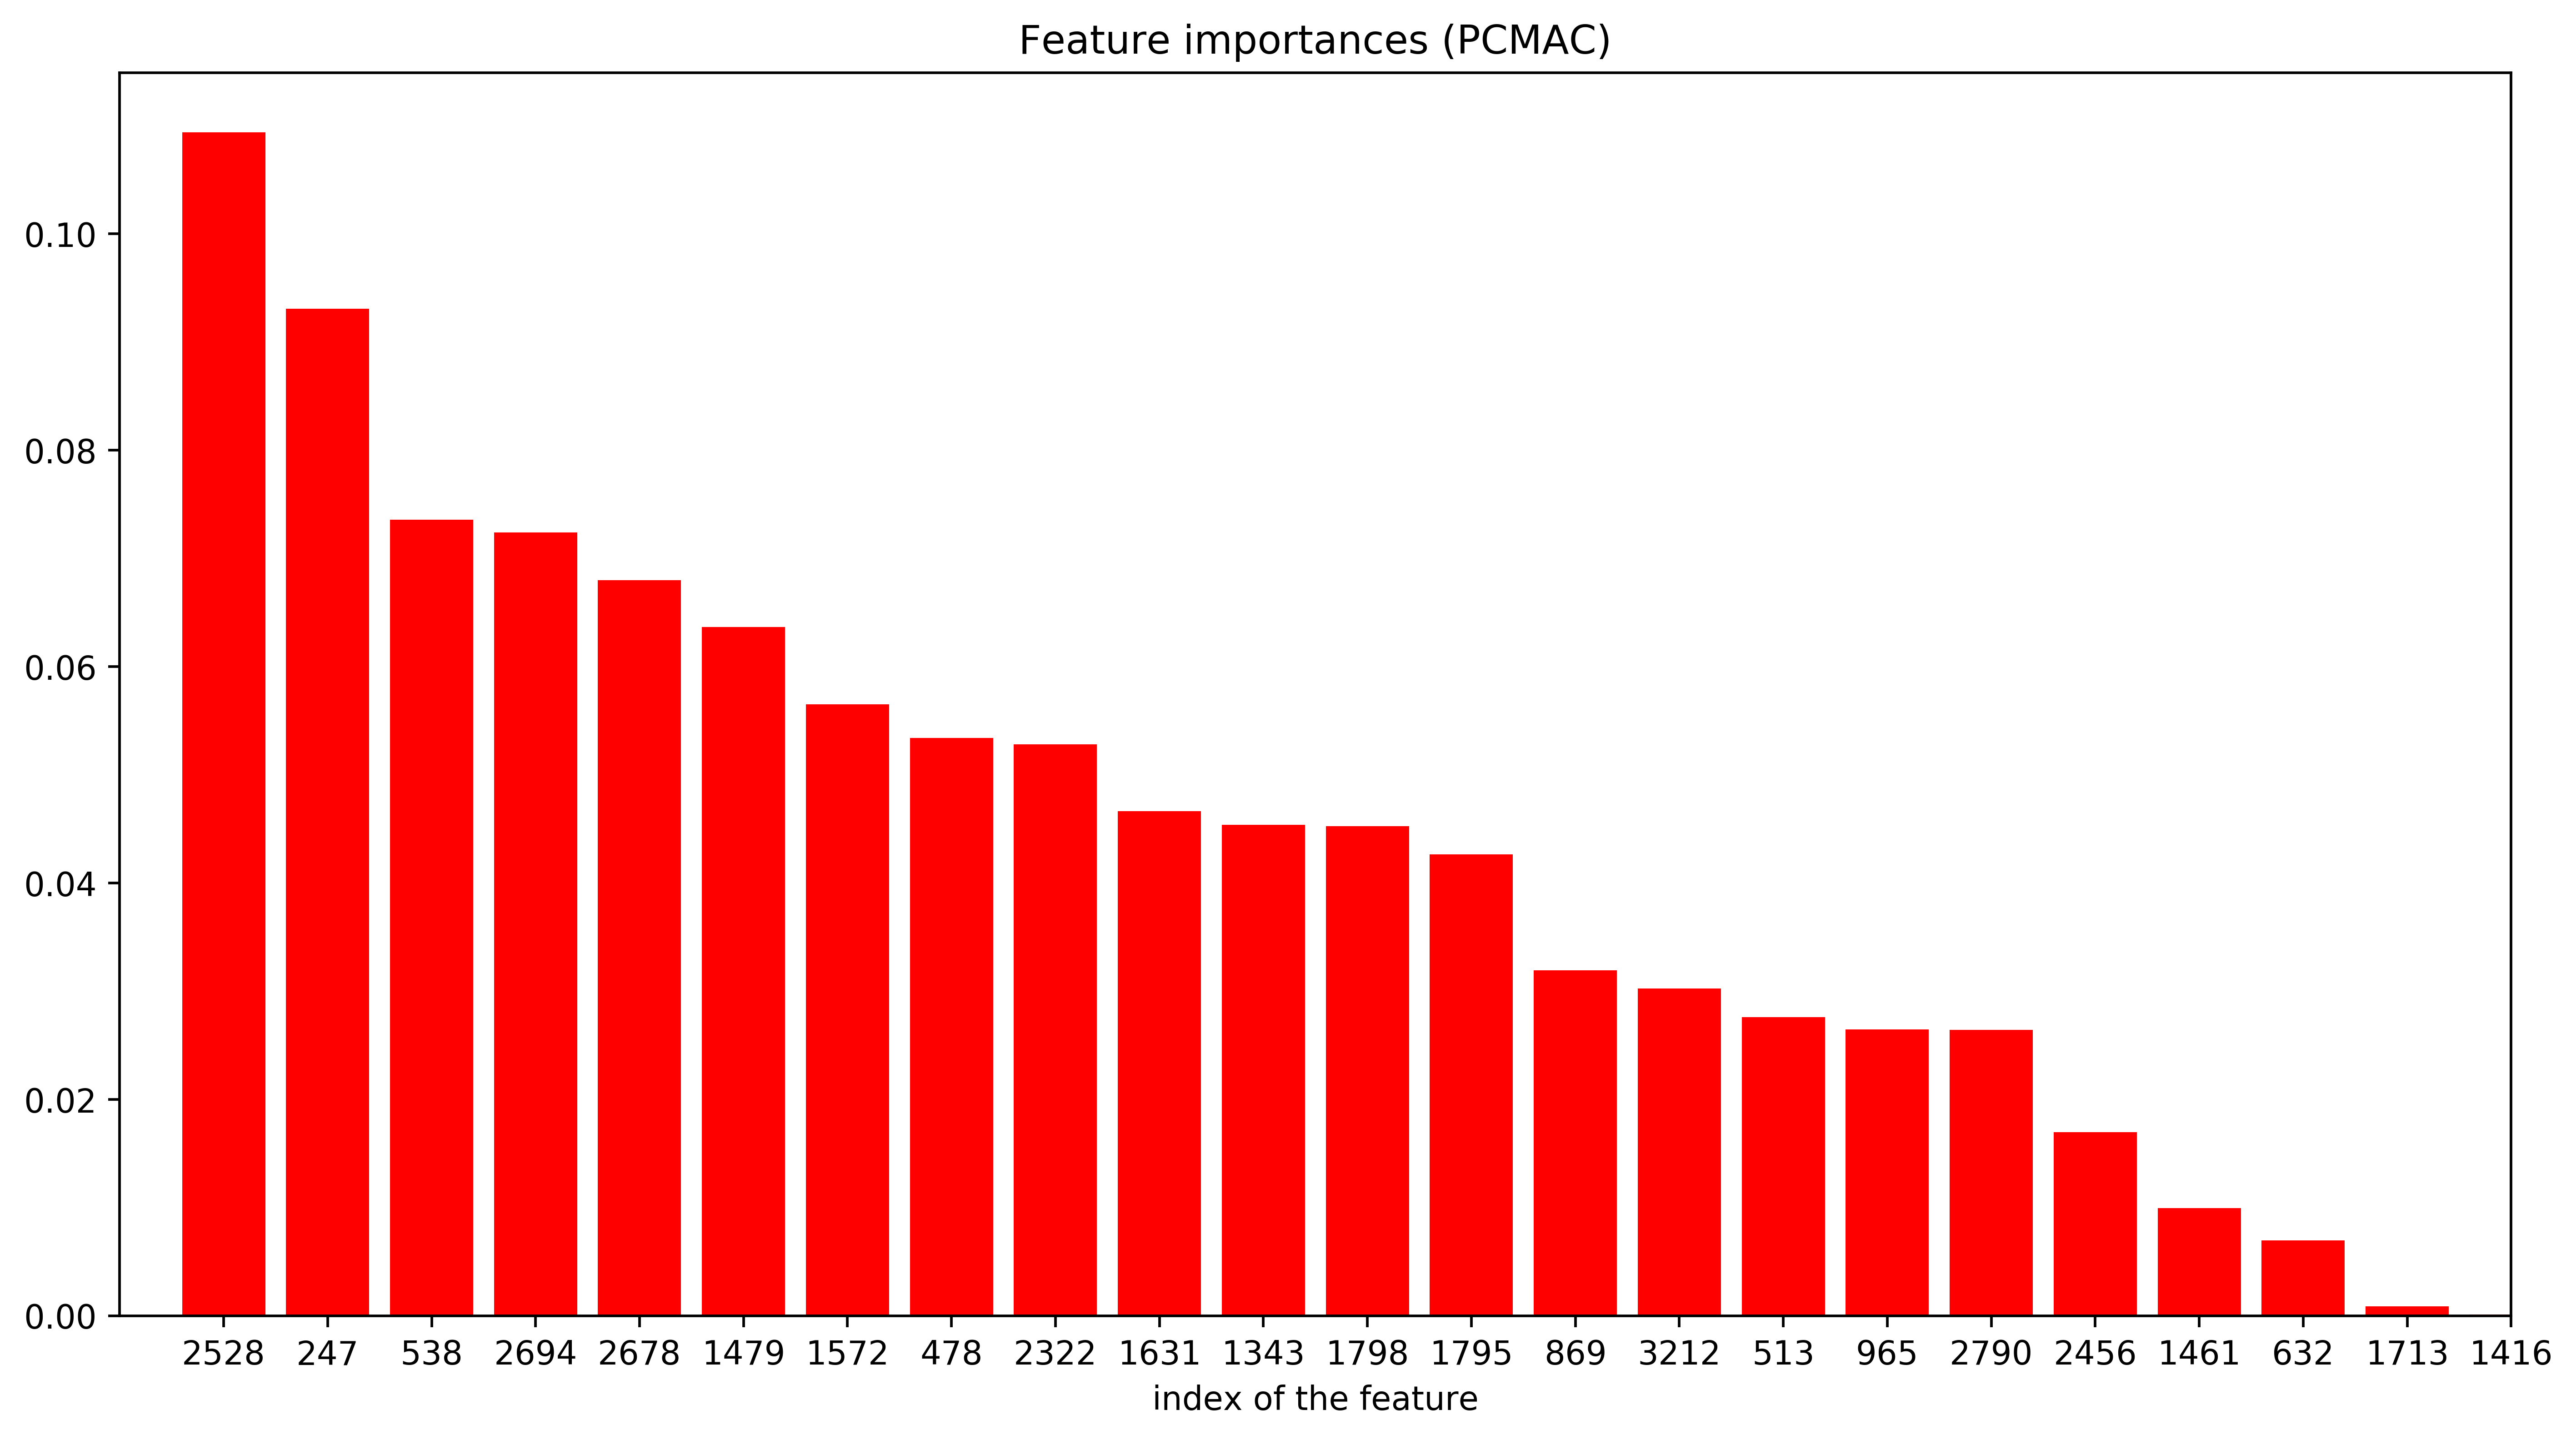

In [82]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
rfc = RandomForestClassifier(max_depth=2, random_state=0)
rfc.fit(X,y)
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(num=None, figsize=(11, 6), dpi=520, facecolor='w', edgecolor='k')
plt.title("Feature importances (PCMAC)")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, 22])
plt.tight_layout()
plt.xlabel("index of the feature")
plt.savefig("boo.png")
plt.show()



In [79]:
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
lasso = LassoCV(alphas = alpha_ridge,max_iter=1000)
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.01,l1_ratio = 0.5)
# 0.0008
sfm = SelectFromModel(elastic_net, threshold="5*mean")
sfm.fit(X_train, y_train)
n_features = sfm.transform(X_train).shape[1]
# print(rfc.feature_importances_)
print(n_features)
X_transform = sfm.transform(X_train)

# print(rfc.feature_importances_)
clf1 = skl.svm.SVC()
# clf1 = skl.svm.SVC()
clf1.fit(X_transform, y_train)
score = clf1.score(sfm.transform(X_test), y_test)
print('Accuracy: {:.2%}'.format(score))

117
Accuracy: 87.99%


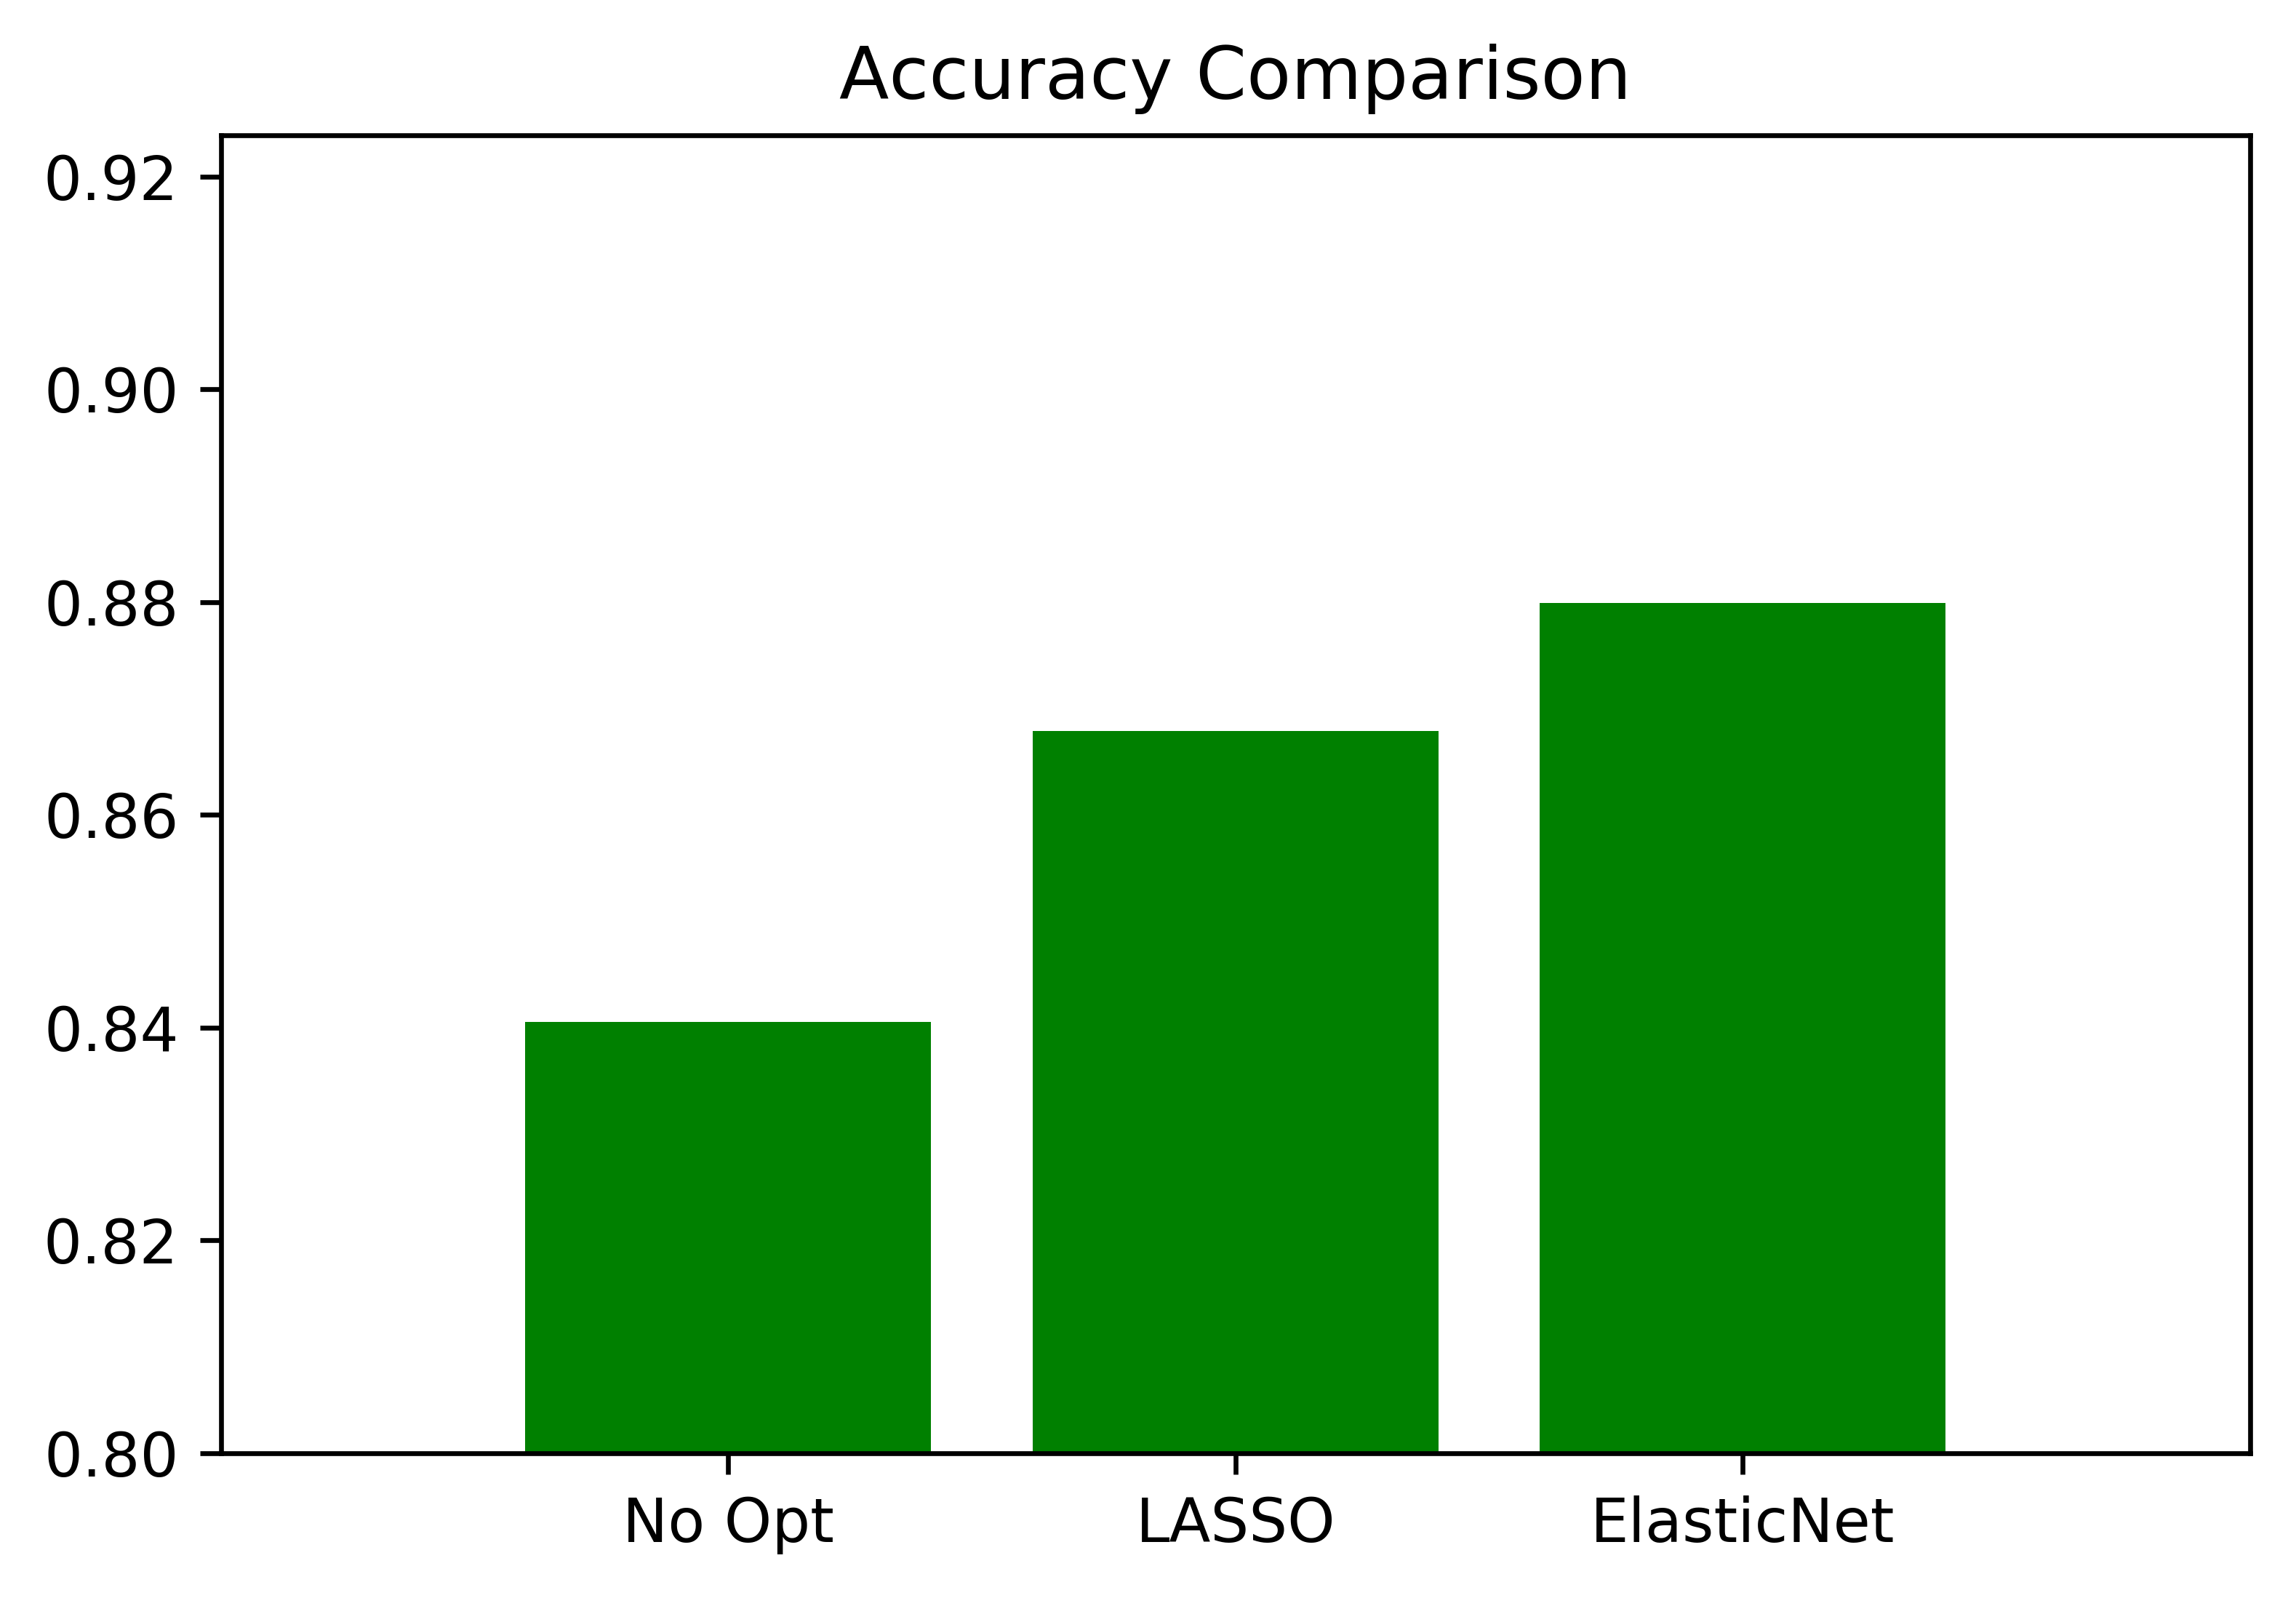

In [80]:
plt.figure()
plt.figure(num=None, figsize=(6, 4), dpi=600, facecolor='w', edgecolor='k')
plt.title("Accuracy Comparison")
# 3289，62，117
plt.bar(range(3), [0.8405,0.8679,0.8799],
       color="g", align="center")

labels = ["No Opt","LASSO","ElasticNet"]
plt.xticks(range(3),labels )
plt.xlim([-1, 3])
plt.ylim(ymin=0.8)
plt.savefig("boo1.png")
plt.show()

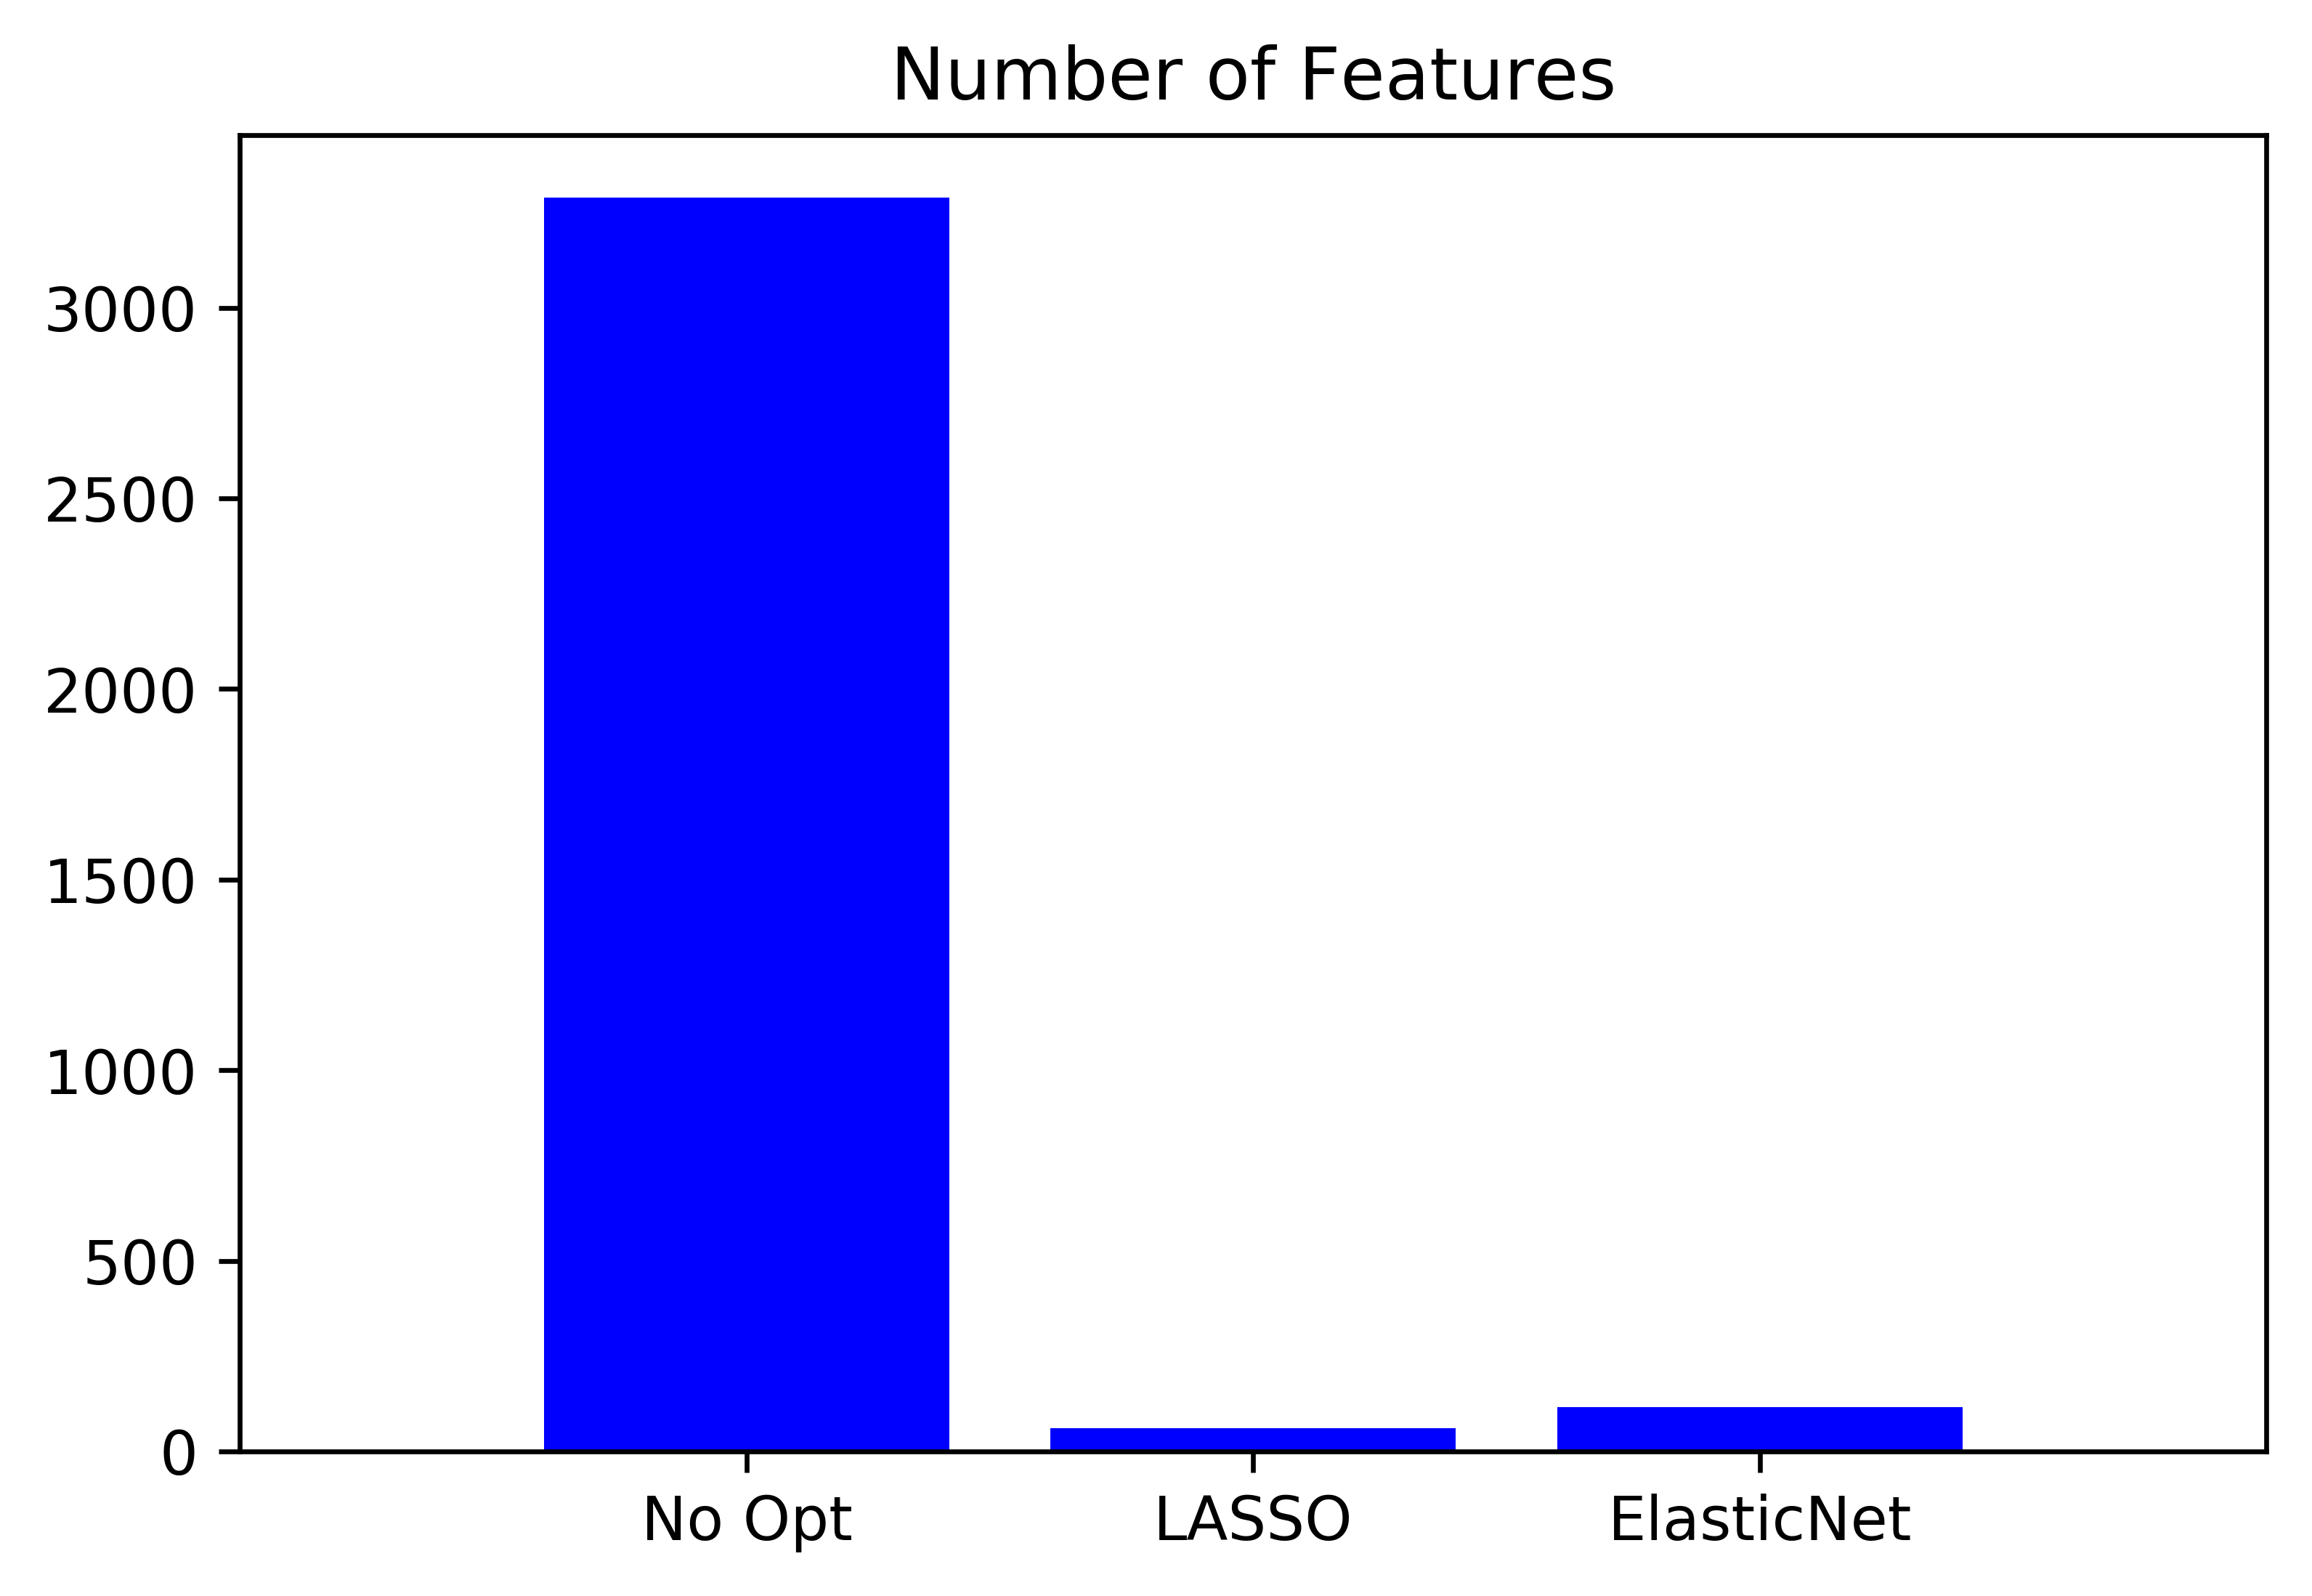

In [81]:
plt.figure()
plt.figure(num=None, figsize=(6, 4), dpi=600, facecolor='w', edgecolor='k')
plt.title("Number of Features")
# 3289，62，117
plt.bar(range(3), [3289,62,117],
       color="b", align="center")

labels = ["No Opt","LASSO","ElasticNet"]
plt.xticks(range(3),labels )
plt.xlim([-1, 3])
plt.ylim(ymin=0.8)
plt.savefig("boo2.png")
plt.show()